# Lack of Robustness in Markowitz Analysis

### Parameter Uncertainty

Estimation error is the key challenge in portoflio optimisation. If you feed an optimiser with severely mis-estimated parameters then you will got extreme portfolios with massive differences in asset allocation, the portfolio will not look reasonable. Optimisers fall victim to essentially becoming error-maximisers, in an optimsation process the asset that gets the largest allocation is typically not the most attractive asset to the investor, instead it is the asset that suffers from the largest amount of estimation risk. 

### Improving Parameter Estimates

Various methodologies exist for improving estimates for expected returns and covariance parameters. However, some uncertainty always remains which are particularly large for expected returns. It is in the realm of possibility to efficiently improve covariance estimates, but on the other hand, it is near impossible to get more accurate estimates on the expected return given a sample, the estiamtes are usually very noisy and unreliable.

### Global Minimum Variance (GMV) Portfolio 

So, in practice what do people do? The resort to the GMV portfolio which is the only portfolio on the efficient frontier for which an expected return parameter is not requied. This is a good apporach as we are just attempting to minimise variance and nothing else, so we can focus on improving the covariance parameter estiamte and not worry about the expected return parameter estiamate.

# Lab Session - Lack of Robustness of the Markowitz Procedure and the GMV 

In [1]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [2]:
ind = erk.get_ind_returns()
er = erk.annualise_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [3]:
l = ['Food', 'Steel']
erk.msr(0.1, er[l], cov.loc[l, l])

array([0.75040364, 0.24959636])

In [4]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [6]:
erk.msr(0.1, np.array([0.11, 0.12]), cov.loc[l, l])

array([0.57930356, 0.42069644])

In [7]:
erk.msr(0.1, np.array([0.10, 0.13]), cov.loc[l, l])

array([2.08166817e-17, 1.00000000e+00])

In [8]:
erk.msr(0.1, np.array([0.13, 0.10]), cov.loc[l, l])

array([1., 0.])

<AxesSubplot:xlabel='Volatility'>

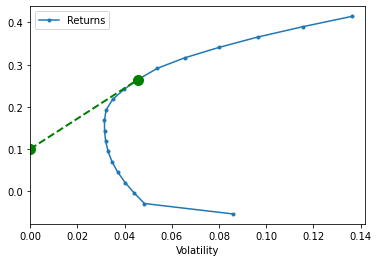

In [9]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

We want out `plot_ef` function to plot the GMV and Equally Weighted (EW) portfolios.

<AxesSubplot:xlabel='Volatility'>

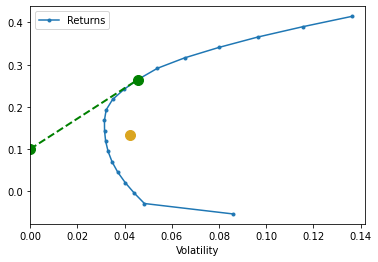

In [10]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

<AxesSubplot:xlabel='Volatility'>

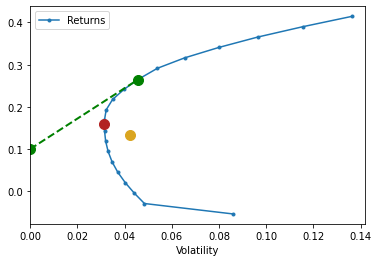

In [17]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)